In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
#from google.colab import auth
from oauth2client.client import GoogleCredentials

DATASET AND DATA CLEANING, WEINA

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

NameError: name 'auth' is not defined

In [ ]:
file_id = '1KjJc2BJbIiz94T3S4ObeNbZL0CwHXitJ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# In real Titanic's maiden voyage 10th-15th April 1912 the estimated dataset as bellows:

# Titanic's passengers numbered approximately 1,317 people: 
# 324 in First Class, 284 in Second Class, and 709 in Third Class. 
# Of these, 869 (66%) were male and 447 (34%) female. 
# There were 107 children aboard, the largest number of whom were in Third Class.
# The ship was considerably under capacity on her maiden voyage -
# Titanic’s actual capacity: accommodate 2,453 passengers—833 First Class, 614 Second Class, and 1,006 Third Class.

In [22]:
# Import Numpy and Pandas Packages

import numpy as np
import pandas as pd

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# 1. Remove Irrelevant Data-Column:

# In raw-data 'train.csv' Cabin has 687 null out of 891 sample, hence, suggesting drop this column for data analysis perspective

df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
df.drop('Cabin', axis = 'columns',inplace=True)

In [67]:
# Check the Feature list post-Drop

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [73]:
#2. Finding the Missing-Value and Bad-Value:

# Fixing raw-data 'train.csv' Age 177 missing values (20% of Sample-Size)
# Per Kaggle,  Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5?

df.iloc[0:10, 1:6]

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
5,0,3,"Moran, Mr. James",male,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


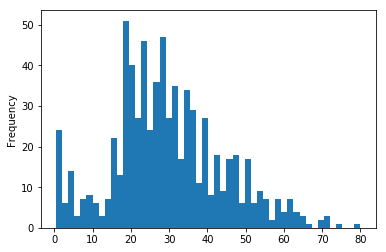

In [92]:
# 2.1 Histogram of survivals_age

# MEAN (Range: Upper-Quartile to Lower-Quartile) of the MEDIAN-of-SURVIVALS-GROUP (80% SAMPLE)


df['Age'].plot.hist(bins=50)

In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [95]:
surviveddf = df[df['Survived'] == 1]

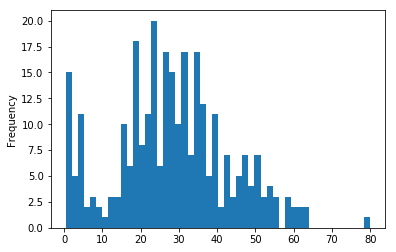

In [96]:
surviveddf['Age'].plot.hist(bins=50)

In [100]:
surviveddf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [108]:
surviveddf.mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

In [129]:
surviveddf['Age'].fillna(surviveddf['Age'].mean(), inplace=True)

In [131]:
surviveddf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

In [97]:
# 2.1 Histogram of survivals_age

# MEAN (Range: Upper-Quartile to Lower-Quartile) of the MEDIAN-of-SURVIVALS-GROUP (80% SAMPLE)

victimsdf = df[df['Survived'] == 0]

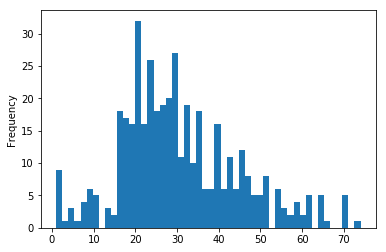

In [99]:
victimsdf['Age'].plot.hist(bins=50)

In [101]:
victimsdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [109]:
victimsdf.mean()

PassengerId    447.016393
Survived         0.000000
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
dtype: float64

In [120]:
# Filling the Missing-Value of AGE for Each Survivials and Victims

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
victimsdf['Age'].fillna(victimsdf['Age'].mean(), inplace=True)

In [128]:
victimsdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
dtype: int64

In [132]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
